K-Means Clustering for Customer Segmentation

In [11]:
import pandas as pd
data = pd.read_csv("/content/Wholesale customers data.csv")
data.isnull().sum()


,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [12]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [13]:
spending_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[spending_columns])

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = []
range_clusters = range(2, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

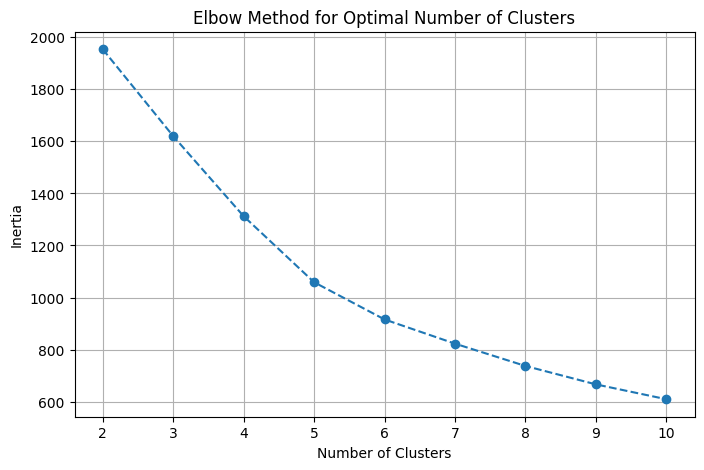

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [27]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=spending_columns)
print(cluster_centers_df)

          Fresh          Milk       Grocery        Frozen  Detergents_Paper  \
0   5336.642105   8820.863158  12902.557895   1623.600000       5206.347368   
1  60393.545455   6327.909091   7255.545455   9484.727273       1349.636364   
2  14998.790698   3627.674419   3912.627907  10036.325581        532.813953   
3  36847.000000  43950.000000  20170.000000  36534.000000        239.000000   
4  12341.000000  25588.500000  80039.000000    578.500000      39464.500000   
5   6654.804469   2486.223464   3120.826816   1676.748603        747.067039   
6   6367.607143  17198.678571  26514.250000   1840.892857      13080.642857   
7  22015.500000   9937.000000   7844.000000  47939.000000        671.500000   
8  34444.333333  55375.333333  49094.333333   4007.666667      23647.333333   
9  24808.907895   3671.763158   5006.828947   2161.039474       1106.065789   

     Delicassen  
0   1676.410526  
1   3605.909091  
2   1469.906977  
3  47943.000000  
4   2079.500000  
5    836.441341  
6   

Evaluating the Optimal Number of Clusters


In [33]:
from sklearn.metrics import silhouette_score
inertia = []
silhouette_scores = []
range_clusters = range(2, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    cluster_labels = kmeans.fit_predict(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

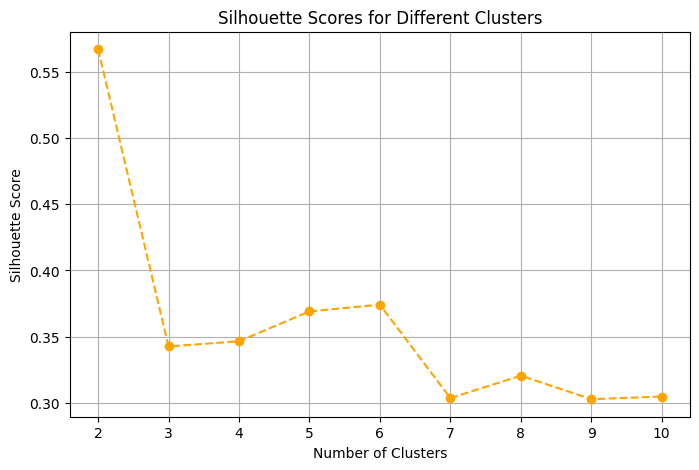

In [34]:
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Scores for Different Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Cluster Analysis and Interpretation

In [36]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data_scaled)
data['Cluster'] = clusters
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=spending_columns)
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=spending_columns)
print(cluster_centers_df)

          Fresh          Milk       Grocery       Frozen  Detergents_Paper  \
0   5671.504762  10238.904762  16269.771429  1394.495238       7050.542857   
1  13478.950464   3244.826625   3936.210526  3463.978328        888.588235   
2  27576.833333  35599.416667  43236.666667  7196.916667      20044.666667   

    Delicassen  
0  1759.838095  
1  1192.123839  
2  8425.333333  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Hierarchical Clustering: Dendrogram and Cluster Formation

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[spending_columns])
linkage_matrix = linkage(data_scaled, method='ward')

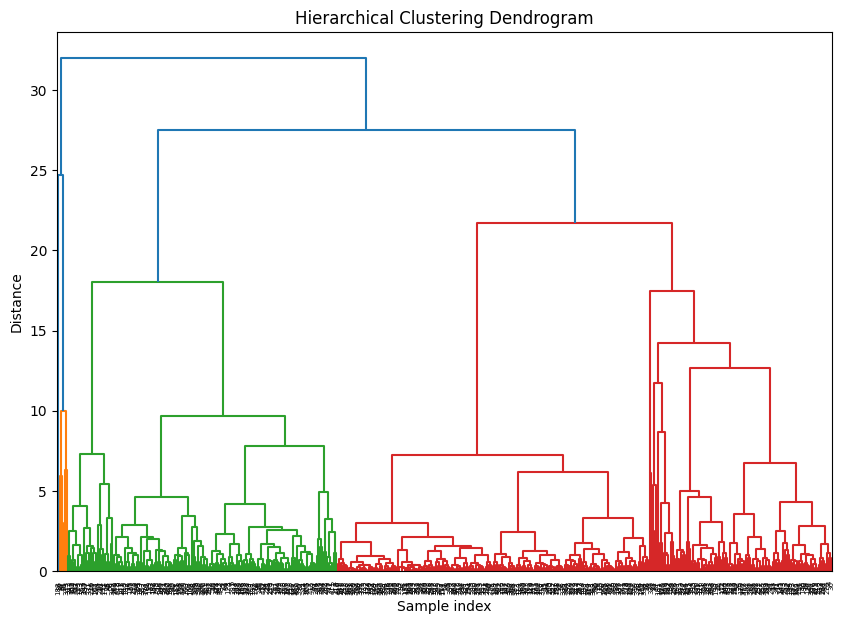

In [38]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [39]:
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
h_clusters = agg_clustering.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [40]:
data['H_Cluster'] = h_clusters
comparison = data[['Cluster', 'H_Cluster']]
print(comparison.head())

   Cluster  H_Cluster
0        1          2
1        0          2
2        0          2
3        1          1
4        1          1


Comparison of Clustering Results

When evaluating the effectiveness of K-Means and hierarchical clustering on the Wholesale Customers dataset, particularly through the lens of cluster cohesion and separation, we employ several analytical methods. The Silhouette Score is paramount in assessing these aspects, providing a numerical value that measures how similar an object is to its own cluster compared to other clusters. A higher Silhouette Score indicates better cluster cohesion, where members of the same cluster are closely packed, and separation, where clusters are well-distinguished from each other.

If K-Means achieves a Silhouette Score higher and hierarchical clustering reaches low, K-Means would appear superior in terms of forming distinct and internally coherent clusters. Visual tools reinforce these metrics scatter plots for K-Means could show well-separated clusters with little overlap and tight groupings, indicating strong separation and cohesion. In contrast, a dendrogram from hierarchical clustering might reveal clusters merging at higher distances, suggesting less cohesion within clusters and a potentially less clear separation between them.

These visual and quantitative analyses together suggest that K-Means might be more suitable for this particular dataset, especially if the goal is to achieve clear, distinct groupings. Hierarchical clustering, while offering valuable insights into the data structure at different levels of granularity, might not provide as sharp distinctions between clusters as K-Means does, depending on the specific characteristics of the data. Therefore, the choice of clustering method can significantly impact the interpretation and utility of the results, guiding decisions in data-driven strategies.
